# Loan Application Status Prediction
#### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score,auc,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data set
df=pd.read_csv(r'C:\Users\user\Desktop\internship\data\DSData-master\loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.drop_duplicates(inplace=True) # dropping duplicates

In [6]:
df.shape # shape after dropping duplicates

(614, 13)

In [7]:
df.isnull().sum()   #checking for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [14]:
# checking for unque values in gender and married
print(df['Gender'].value_counts())
print(df['Married'].value_counts()) 



Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [13]:
print(df['Self_Employed']. value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


Now we will fill null values 

In [15]:
df['Gender']=df.Gender.fillna('Male')
df['Married']=df.Married.fillna('Yes')
df['Self_Employed']=df.Self_Employed.fillna('Yes')

In [16]:
print(df['Dependents']. value_counts())
print(df['Loan_Amount_Term']. value_counts())
print(df['Credit_History']. value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [20]:
#FIll Values of these also
df['Dependents'] = df['Dependents'].fillna('0')


df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna('120.0')


df['Credit_History'] = df['Credit_History'].fillna('0.0')


df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

 After filling all values we will check is there any null values left or not

In [21]:
df.isnull().sum().sum()

0

Now there is o null values we will procced further. We will replace yes or no of loan status with and 0 and 1.

In [23]:
# Create a dictionary to define the replacements
replace_dict = {'Y': 0, 'N': 1}

# Replace the values in the 'loan_status' column
df['Loan_Status'] = df['Loan_Status'].replace(replace_dict)

# Output the modified DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Status,614.0,0.312704,0.463973,0.0,0.00,0.0,1.00,1.0


In [25]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,0.059187
LoanAmount,0.565620,0.187828,1.000000,0.036416
Loan_Status,0.004710,0.059187,0.036416,1.000000


In [28]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.128206
Credit_History      -1.310835
Loan_Status          0.809998
dtype: float64

### Visualization (EDA)

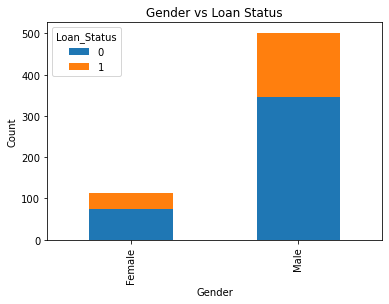

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by gender and loan_status, and count the occurrences
grouped = df.groupby(['Gender', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Loan Status')

# Show the plot
plt.show()


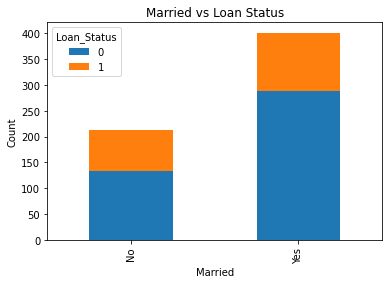

In [36]:
# Group the data by married and loan_status, and count the occurrences
grouped = df.groupby(['Married', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married vs Loan Status')

# Show the plot
plt.show()

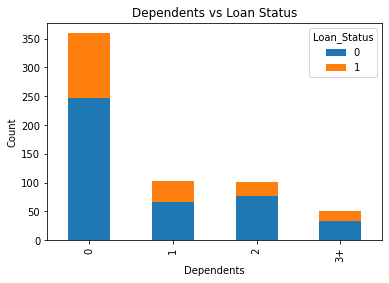

In [37]:
# Group the data by Dependents and loan_status, and count the occurrences
grouped = df.groupby(['Dependents', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents vs Loan Status')

# Show the plot
plt.show()

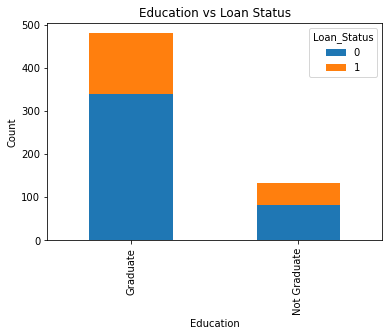

In [38]:
# Group the data by Education and loan_status, and count the occurrences
grouped = df.groupby(['Education', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs Loan Status')

# Show the plot
plt.show()

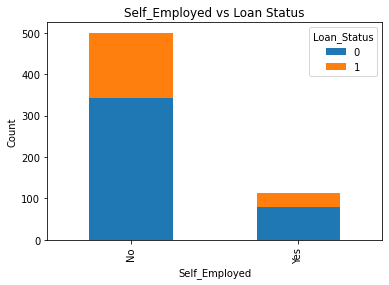

In [39]:
# Group the data by Self_Employed and loan_status, and count the occurrences
grouped = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Self_Employed vs Loan Status')

# Show the plot
plt.show()

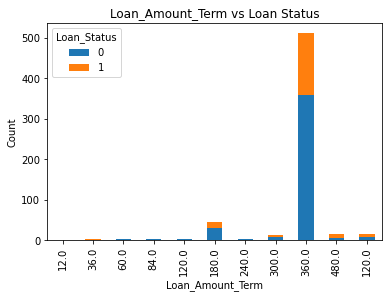

In [40]:
# Group the data by Loan_Amount_Term and loan_status, and count the occurrences
grouped = df.groupby(['Loan_Amount_Term', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.title('Loan_Amount_Term vs Loan Status')

# Show the plot
plt.show()

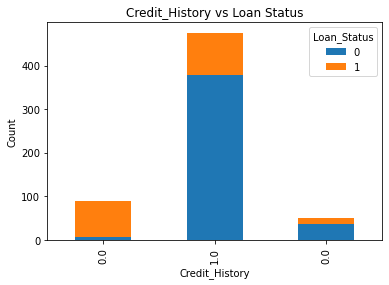

In [41]:
# Group the data by Credit_History and loan_status, and count the occurrences
grouped = df.groupby(['Credit_History', 'Loan_Status']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Credit_History vs Loan Status')

# Show the plot
plt.show()

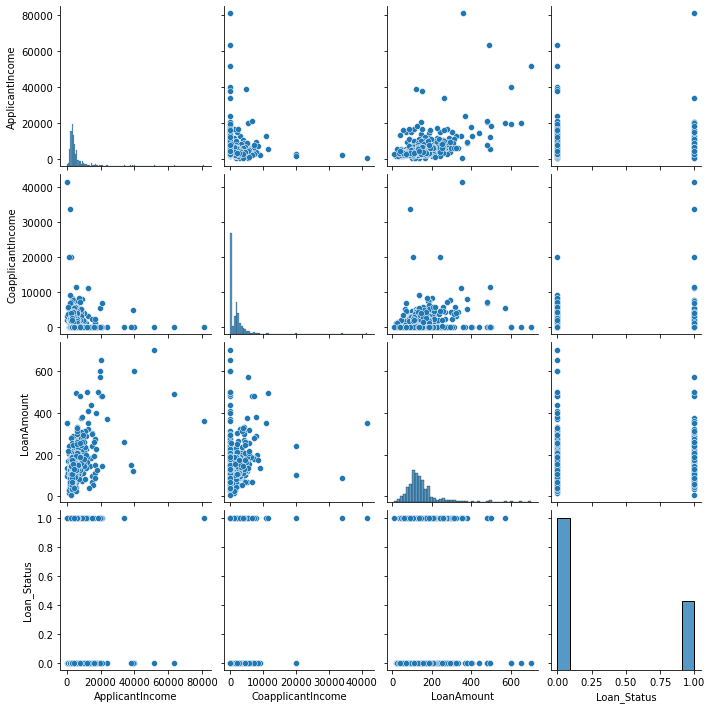

In [42]:
# PLotting pair plot
sns.pairplot(df)
plt.show()

<AxesSubplot:>

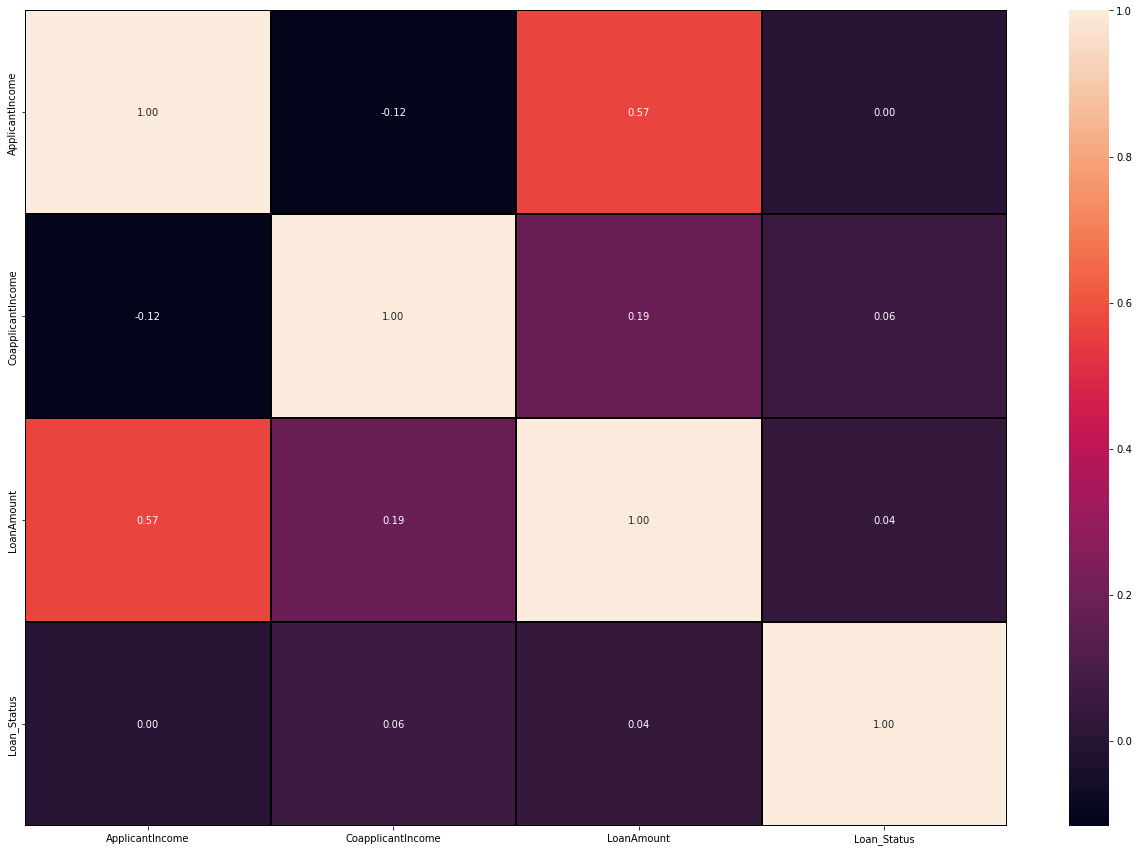

In [43]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

#### Checking for outliers by plotting 

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Status,614.0,0.312704,0.463973,0.0,0.00,0.0,1.00,1.0


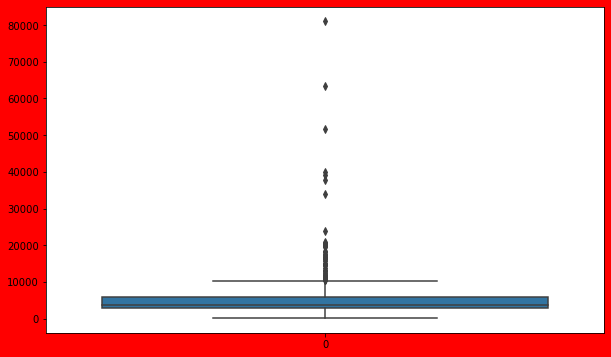

In [47]:
plt.figure(figsize=(10,6),facecolor='r')
sns.boxplot(data=df['ApplicantIncome'])
plt.show()

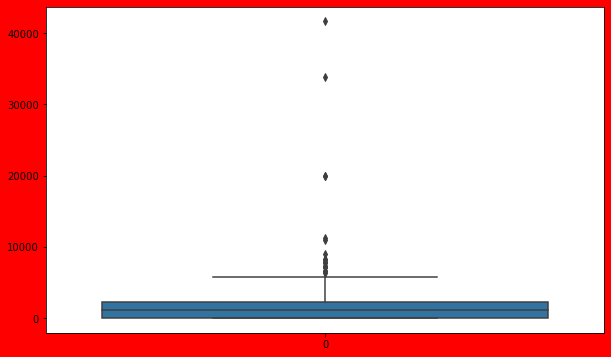

In [49]:
plt.figure(figsize=(10,6),facecolor='r')
sns.boxplot(data=df['CoapplicantIncome'])
plt.show()

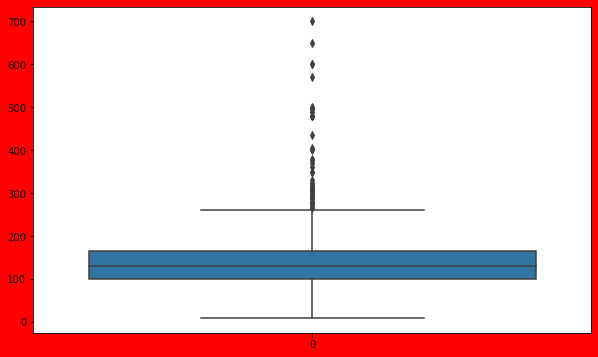

In [50]:
plt.figure(figsize=(10,6),facecolor='r')
sns.boxplot(data=df['LoanAmount'])
plt.show()

Removing outliers by z-score method.

In [55]:
from scipy.stats import iqr
from scipy import stats
# Define a function to remove outliers based on Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df_cleaned = df[(z_scores < threshold).all(axis=1)]
    return df_cleaned

# Specify the columns on which you want to remove outliers
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Remove outliers using the Z-score method
df_cleaned = remove_outliers_zscore(df, columns_to_check)

# Output the cleaned DataFrame
print(df_cleaned)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0               5849                0.0  146.412162            

In [56]:
# Calculate the percentage loss of data
percentage_loss = (len(df) - len(df_cleaned)) / len(df) * 100

# Output the percentage loss
print("Percentage Loss: {:.2f}%".format(percentage_loss))


Percentage Loss: 4.07%


In [57]:
# now we willseprate features and labels
features=df_cleaned.drop('Loan_Status',axis=1)
labels=df_cleaned.Loan_Status

In [65]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Select only the numeric columns
numeric_columns = features.select_dtypes(include=[np.number])

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
scaled_features = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the scaled features
scaled_f = pd.DataFrame(scaled_features, columns=numeric_columns.columns)

# Output the scaled DataFrame
print(scaled_f)


     ApplicantIncome  CoapplicantIncome  LoanAmount
0           0.277770           0.000000    0.370383
1           0.216065           0.167929    0.320755
2           0.138909           0.000000    0.153639
3           0.118585           0.262584    0.299191
4           0.285129           0.000000    0.355795
..               ...                ...         ...
584         0.134035           0.000000    0.167116
585         0.192816           0.000000    0.083558
586         0.386119           0.026726    0.657682
587         0.362285           0.000000    0.479784
588         0.216065           0.000000    0.334232

[589 rows x 3 columns]


In [66]:
scaled_f.shape

(589, 3)

In [70]:
# now we will get the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [71]:
corr_features = correlation(df_cleaned, 0.5)
len(set(corr_features))

0

In [72]:
df_cleaned.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.044815
ApplicantIncome      0.005043
LoanAmount           0.042738
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

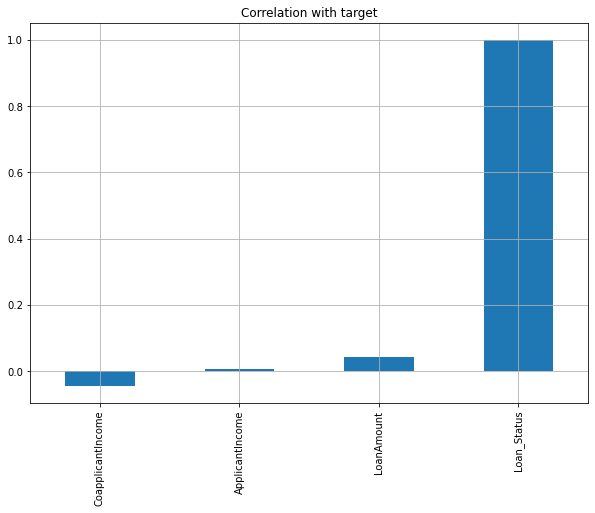

In [73]:
df_cleaned.corr()['Loan_Status'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target') # graphical representatio

In [74]:
# dropping less correalted columns
X=df_cleaned.drop(columns=['CoapplicantIncome'],axis=1)
y=df_cleaned['Loan_Status']

In [80]:
# Exclude non-numeric columns from X
numeric_columns = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_columns]

# Apply PowerTransformer to the numeric columns
scaler = PowerTransformer()
scaled = scaler.fit_transform(X_numeric)


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled, i) for i in range (scaled.shape[1])]
vif["Features"] = X_numeric.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,1.237825,ApplicantIncome
1,1.239795,LoanAmount
2,1.001853,Loan_Status


In [84]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [85]:
# we will do over sampling of data
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [86]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling on your data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)


### Apply ML

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.25, random_state=30)

#### Logestic Regression

In [104]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
test_accuracy =accuracy_score(y_test,predlr)*100
train_accuracy=accuracy_score(y_train,pred_train_lr)*100
print('Test Accuracy : ',test_accuracy)
print('Training Accuracy :',train_accuracy)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy :  100.0
Training Accuracy : 100.0
[[103   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        45

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



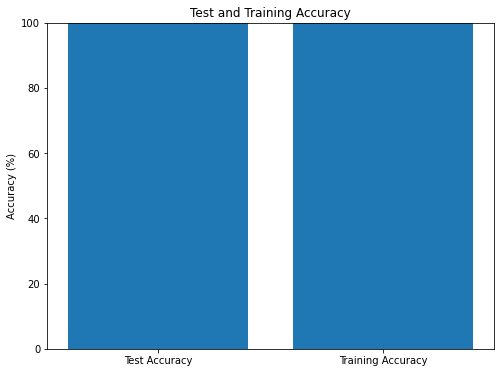

In [105]:
# Visualize accuracy
accuracy_labels = ['Test Accuracy', 'Training Accuracy']
accuracy_scores = [test_accuracy, train_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores)
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Test and Training Accuracy')
plt.show()

#### KNeighborsClassifier

In [101]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
test_accuracy =accuracy_score(y_test,predKNN)*100
train_accuracy=accuracy_score(y_train,pred_train_KNN)*100
print('Test Accuracy : ',test_accuracy)
print('Training Accuracy :',train_accuracy)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy :  61.48648648648649
Training Accuracy : 76.41723356009071
[[82 21]
 [36  9]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       103
           1       0.30      0.20      0.24        45

    accuracy                           0.61       148
   macro avg       0.50      0.50      0.49       148
weighted avg       0.57      0.61      0.59       148



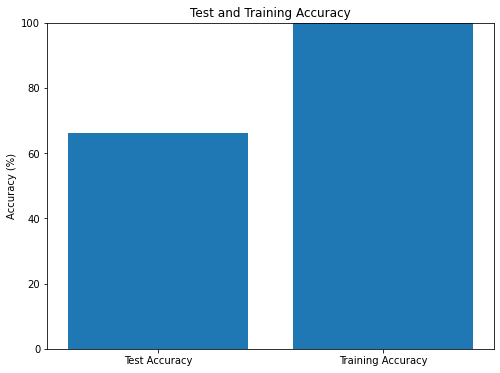

In [102]:
# Visualize accuracy
accuracy_labels = ['Test Accuracy', 'Training Accuracy']
accuracy_scores = [test_accuracy, train_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores)
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Test and Training Accuracy')
plt.show()

#### DecisionTreeClassifier

In [106]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
test_accuracy =accuracy_score(y_test,preddt)*100
train_accuracy=accuracy_score(y_train,pred_train_dt)*100
print('Test Accuracy : ',test_accuracy)
print('Training Accuracy :',train_accuracy)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy :  100.0
Training Accuracy : 100.0
[[103   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        45

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



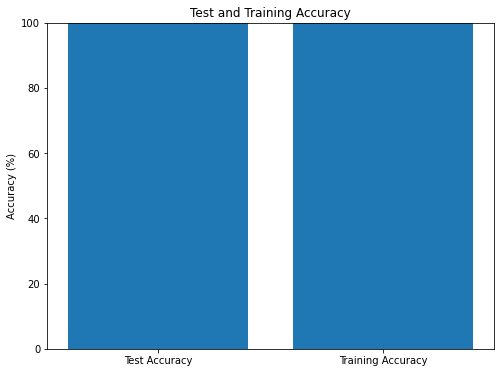

In [107]:
# Visualize accuracy
accuracy_labels = ['Test Accuracy', 'Training Accuracy']
accuracy_scores = [test_accuracy, train_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores)
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Test and Training Accuracy')
plt.show()

#### RandomForestClassifier

In [108]:
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
test_accuracy =accuracy_score(y_test,predrdf)*100
train_accuracy=accuracy_score(y_train,pred_train_rdf)*100
print('Test Accuracy : ',test_accuracy)
print('Training Accuracy :',train_accuracy)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy :  100.0
Training Accuracy : 100.0
[[103   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        45

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



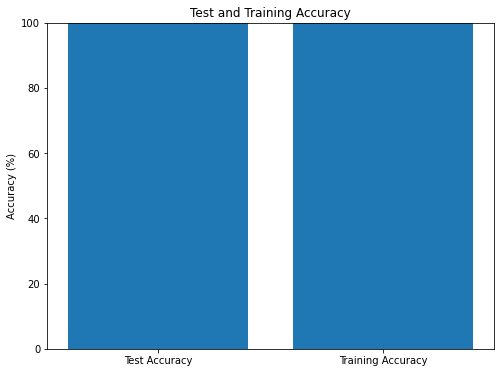

In [109]:
# Visualize accuracy
accuracy_labels = ['Test Accuracy', 'Training Accuracy']
accuracy_scores = [test_accuracy, train_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores)
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Test and Training Accuracy')
plt.show()

#### Support Vector Classifier

In [112]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
test_accuracy =accuracy_score(y_test,pred_svc)*100
train_accuracy=accuracy_score(y_train,pred_train_svc)*100
print('Test Accuracy : ',test_accuracy)
print('Training Accuracy :',train_accuracy)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy :  69.5945945945946
Training Accuracy : 68.93424036281179
[[103   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       103
           1       0.00      0.00      0.00        45

    accuracy                           0.70       148
   macro avg       0.35      0.50      0.41       148
weighted avg       0.48      0.70      0.57       148



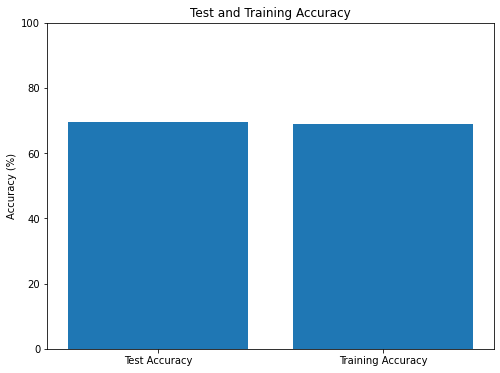

In [113]:
# Visualize accuracy
accuracy_labels = ['Test Accuracy', 'Training Accuracy']
accuracy_scores = [test_accuracy, train_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(accuracy_labels, accuracy_scores)
plt.ylim([0, 100])
plt.ylabel('Accuracy (%)')
plt.title('Test and Training Accuracy')
plt.show()

#### Hyperparameter tunning


In [120]:
RandomForestClassifier()
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [121]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

100.0

The RDF model has already achieved test accuracy of 100. Due to the fact that it still produces the same results after hyperparameter tuning, this model does not require it.

### roc_auc curve

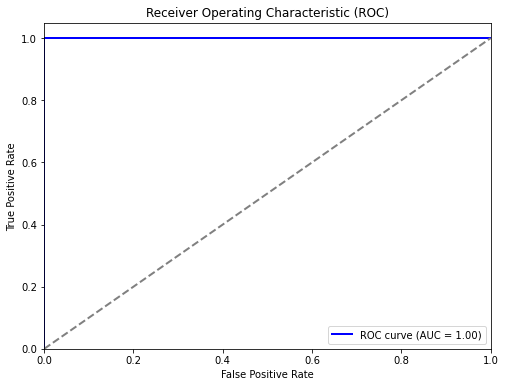

In [119]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Create and fit RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict probabilities for positive class
probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


##### Finish